In [52]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import re
import random
import operator
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import datetime, json, pprint
import urllib3 as url

import seaborn as sns


# inline plot
%matplotlib inline
#%%javascript
#IPython.OutputArea.auto_scroll_threshold = 9999;

In [31]:
http = url.PoolManager()
pp = pprint.PrettyPrinter(indent=4)
pd.options.display.max_seq_items = 100

In [4]:
df = pd.read_csv('data/crunchbase-data/acquisitions.csv')

In [5]:
df = df.where((pd.notnull(df)), np.nan)
df["acquired_date"] = pd.to_datetime(df["acquired_at"], errors='coerce',format="%Y-%m-%d")
# df["acquired_date"] = df['acquired_at'].dropna()

In [6]:
df["acquired_date"].dropna(inplace=True)
df["acquired_date"]

0       2012-07-23
1       2012-02-02
2       2005-06-12
3       2014-01-07
4       2001-02-02
5       2015-10-28
6       2006-01-01
7       2012-09-22
8       2013-11-14
9       2012-10-03
10      2013-02-27
11      2015-08-03
12      2011-01-25
13      2009-04-14
14      2008-12-04
15      2015-11-23
16      2015-11-23
17      2015-06-23
18      2011-10-01
19      2011-12-06
20      2012-08-06
21      2013-07-03
22      2014-12-12
23      1999-11-22
24      2012-01-04
25      2009-09-08
26      2008-11-01
27      2015-08-18
28      2015-11-04
29      2015-11-04
           ...    
18937   2015-10-28
18938   2015-11-06
18939   2013-07-18
18940   2009-11-23
18941   2012-09-20
18942   2013-03-01
18943   2014-01-15
18944   2015-08-17
18945   2014-03-17
18946   2008-08-01
18947   2015-01-13
18948   2015-04-07
18949   2014-03-12
18950   2011-12-15
18951   2015-02-09
18952   2015-10-21
18953   2008-05-16
18954   2014-04-11
18955   2013-09-01
18956   2006-02-06
18957   2013-08-26
18958   2011

In [7]:
df["acquired_date"].head(5).apply(lambda x: x.year)

0    2012
1    2012
2    2005
3    2014
4    2001
Name: acquired_date, dtype: int64

In [8]:
df["acq_year"] = df["acquired_date"].apply(lambda x: x.year)
df["acq_month"] = df["acquired_date"].apply(lambda x: x.month)
df["acq_day"] = df["acquired_date"].apply(lambda x: x.day)
df["acq_weekday"] = df["acquired_date"].apply(lambda x: x.weekday())

# df["acq_year"] = df["acquired_date"].apply(lambda x: x.year() if isinstance(x,np.datetime64)== True else "") 
# df["acq_month"] = df["acquired_date"].apply(lambda x: x.month() if isinstance(x,np.datetime64)== True else "") 
# df["acq_day"] = df["acquired_date"].apply(lambda x: x.day() if isinstance(x,np.datetime64)== True else "") 
# df["acq_weekday"] = df["acquired_date"].apply(lambda x: x.weekday() if isinstance(x,np.datetime64)== True else "") 

In [9]:
df.head(5)

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,...,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code,acquired_date,acq_year,acq_month,acq_day,acq_weekday
0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,48,Moscow,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,...,Barcelona,2012-07-23,2012-07,NaN,USD,2012-07-23,2012.0,7.0,23.0,0.0
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,NaN,NaN,NaN,NaN,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,...,Seattle,2012-02-02,2012-02,9000000.0,USD,2012-02-02,2012.0,2.0,2.0,3.0
2,/organization/1-800-communications,1-800 Communications,NaN,USA,NY,Long Island,Hicksville,/organization/carsdirect-com,CarsDirect.com,E-Commerce,...,El Segundo,2005-06-12,2005-06,NaN,USD,2005-06-12,2005.0,6.0,12.0,6.0
3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,UT,Salt Lake City,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,...,Boston,2014-01-07,2014-01,NaN,USD,2014-01-07,2014.0,1.0,7.0,1.0
4,/organization/1-844-446-4460-pogo-customer-ser...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,NaN,NaN,NaN,NaN,/organization/pogo-customer-service-number-1-8...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,...,Mamaroneck,2001-02-02,2001-02,NaN,USD,2001-02-02,2001.0,2.0,2.0,4.0


Number of rows: 18968
['company_permalink' 'company_name' 'company_category_list'
 'company_country_code' 'company_state_code' 'company_region'
 'company_city' 'acquirer_permalink' 'acquirer_name'
 'acquirer_category_list' 'acquirer_country_code' 'acquirer_state_code'
 'acquirer_region' 'acquirer_city' 'acquired_at' 'acquired_month'
 'price_amount' 'price_currency_code' 'acquired_date' 'acq_year'
 'acq_month' 'acq_day' 'acq_weekday']


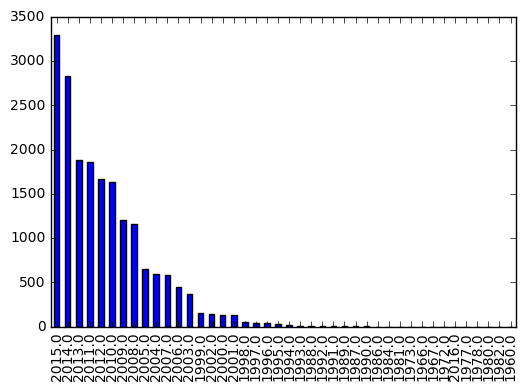

In [10]:
print("Number of rows:",len(df.index))
print(df.columns.values)
# df.plot(x='acq_year', y='day_of_week', kind='hist')
pd.value_counts(df['acq_year']).plot.bar()

In [11]:
pd.value_counts(df['price_amount']).plot.scatter(y=df["price_amount"],x)

AttributeError: 'SeriesPlotMethods' object has no attribute 'scatter'

In [13]:
for col in df.columns:
   binned_name = col + '_binned'
   num_bins = np.ceil(df[col].max()/5)
   df[binned_name] = pd.cut(df[col],num_bins,labels=False)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [54]:
# Drop currency codes not USD
df.drop(df[df["price_currency_code"]!= "USD"].index, inplace=True)

In [39]:
print(len(df["acquirer_category_list"].unique()))
print(len(str(df["company_category_list"].unique())))

3772
274


In [55]:
df["price_currency_code"].unique()

array(['USD'], dtype=object)

In [28]:
df.loc[df["price_amount"].idxmax()]

company_permalink                        /organization/allergan
company_name                                           Allergan
company_category_list     Biotechnology|Medical|Pharmaceuticals
company_country_code                                        USA
company_state_code                                           CA
company_region                                          Anaheim
company_city                                             Irvine
acquirer_permalink                         /organization/pfizer
acquirer_name                                            Pfizer
acquirer_category_list                            Biotechnology
acquirer_country_code                                       USA
acquirer_state_code                                          NY
acquirer_region                                   New York City
acquirer_city                                          New York
acquired_at                                          2015-11-23
acquired_month                          

In [29]:
df.loc[df["price_amount"].idxmin()]

company_permalink                         /organization/airtreks
company_name                                            AirTreks
company_category_list                                        NaN
company_country_code                                         NaN
company_state_code                                           NaN
company_region                                               NaN
company_city                                                 NaN
acquirer_permalink        /organization/bootsnall-travel-network
acquirer_name                           BootsnAll Travel Network
acquirer_category_list                                       NaN
acquirer_country_code                                        NaN
acquirer_state_code                                          NaN
acquirer_region                                              NaN
acquirer_city                                                NaN
acquired_at                                           2013-12-06
acquired_month           

In [46]:
pd.plot.scatter(y=df["price_amount"],x=df["acq_year"])

AttributeError: module 'pandas' has no attribute 'plot'

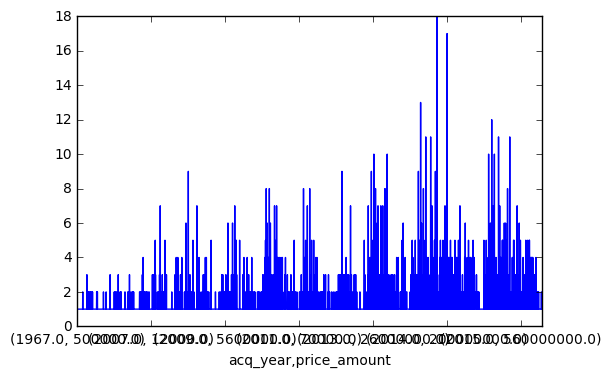

In [50]:
 df[['acq_year','price_amount']].groupby(['acq_year','price_amount']).agg(len).plot()

In [12]:
group_names = ['Low', 'Okay', 'Good', 'Great']
categories = pd.cut(df['postTestScore'], bins, labels=group_names)
df['categories'] = pd.cut(df['postTestScore'], bins, labels=group_names)
categories

5.000000e+07    71
1.000000e+07    70
3.000000e+07    68
2.000000e+07    67
1.000000e+08    67
2.000000e+08    61
1.500000e+07    53
2.500000e+07    51
4.000000e+07    45
5.000000e+06    42
6.000000e+07    40
1.500000e+08    39
8.000000e+07    38
5.000000e+08    32
3.000000e+08    31
4.000000e+08    30
1.200000e+07    29
9.000000e+07    28
7.000000e+07    28
2.000000e+06    28
3.500000e+08    27
1.600000e+08    27
1.200000e+08    26
2.500000e+08    25
3.000000e+06    24
1.250000e+08    24
4.500000e+08    23
9.000000e+06    23
3.500000e+07    23
1.000000e+09    23
                ..
5.010000e+08     1
1.750000e+06     1
1.725000e+07     1
1.910000e+08     1
3.486000e+08     1
1.940000e+09     1
3.969000e+08     1
1.018000e+07     1
1.380000e+08     1
2.980000e+08     1
1.010000e+10     1
7.810000e+07     1
5.600000e+10     1
2.870000e+07     1
2.840000e+06     1
4.814000e+07     1
6.650000e+07     1
4.360000e+07     1
9.440000e+08     1
2.520000e+08     1
1.260000e+09     1
2.245400e+08

In [86]:
for unique in df.company_category_list.unique():
    pp.pprint(unique)

'Consumer Electronics|Electronics|Internet'
nan
'Consumer Goods|Retail'
'Apps|Cable|Distribution|Software'
'Art|E-Commerce|Marketplaces'
'Curated Web'
'Analytics'
'Software'
'Web Hosting'
'Big Data|Databases|Data Mining'
'Big Data|Local Businesses|Mobile'
'Retail'
'Financial Services'
'Advertising|Technology'
('Contests|Creative|Design|Entrepreneur|Graphics|Public Relations|Small and '
 'Medium Businesses|Startups|Web Design')
'E-Commerce'
'Augmented Reality|Computer Vision|Games|iPad|Mobile'
'Advertising'
'Clean Technology|Residential Solar'
'Chat|Mobile'
'Doctors|Health Care|Health Care Information Technology|Video|Video Chat'
'Security'
'Banking'
'Public Relations|Services|Social Media'
'Communities|Consulting|Local Businesses'
'Public Relations'
'Business Services|Finance|Insurance'
'Internet|SaaS|Service Providers|Software'
'Advertising|Media'
'Restaurants'
'Presentations|Software'
('iPhone|Media|Messaging|Mobile|Mobile Coupons|Mobile Payments|Mobile '
 'Security|Sales and Marketi

In [118]:
# Drop 0 or less (undisclosed acq)
dfpublicprice = df.drop(df[df["price_amount"] <= 0].index, inplace=False)
# Remove NAN prices
dfpublicprice = dfpublicprice[np.isfinite(dfpublicprice['price_amount'])]

In [119]:
# Remove outliers
dfremovedoutlier=dfpublicprice[np.abs(dfpublicprice.price_amount-dfpublicprice.price_amount.mean())<=(3*dfpublicprice.price_amount.std())]
# Remove pre 1990
dfremovedoutlier=dfremovedoutlier[dfremovedoutlier["acq_year"]>1990]

In [120]:
dfremovedoutlier.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,...,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code,acquired_date,acq_year,acq_month,acq_day,acq_weekday
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,NaN,NaN,NaN,NaN,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,...,Seattle,2012-02-02,2012-02,9000000.0,USD,2012-02-02,2012.0,2.0,2.0,3.0
11,/organization/1010data,1010data,Software,USA,NY,New York City,New York,/organization/advance-publications,Advance Publications,Media,...,Staten Island,2015-08-03,2015-08,500000000.0,USD,2015-08-03,2015.0,8.0,3.0,0.0
25,/organization/170-systems,170 Systems,Software,USA,MA,Boston,Bedford,/organization/kofax,Kofax,Software,...,Irvine,2009-09-08,2009-09,43000000.0,USD,2009-09-08,2009.0,9.0,8.0,1.0
30,/organization/1form-com,1Form.com,NaN,NOR,2,NaN,NaN,/organization/rea-group,REA Group,News,...,Melbourne,2014-01-14,2014-01,15000000.0,USD,2014-01-14,2014.0,1.0,14.0,1.0
31,/organization/1st-bank,1st Bank,NaN,NaN,NaN,NaN,NaN,/organization/gelexir-healthcare,Gelexir Healthcare,Health and Wellness|Health Care,...,Manchester,2015-06-25,2015-06,14200000.0,USD,2015-06-25,2015.0,6.0,25.0,3.0


In [133]:
searchfor = ['App','Software','Mobile','Digital','GPS','Wireless','Cloud','Technology', 'Cyber','Infrastructure','iOS','Online','Data']

In [144]:
# Flag if Software
# dfremovedoutlier = dfremovedoutlier[np.isfinite(dfremovedoutlier['price_amount'])]
dfremovedoutlier["is_tech"] = dfremovedoutlier["company_category_list"].apply(lambda x : str(x)[str(x).contains('|'.join(searchfor))]) #1 if len(x.str.contains('|'.join(searchfor))) > 0 else 0)

AttributeError: 'str' object has no attribute 'contains'

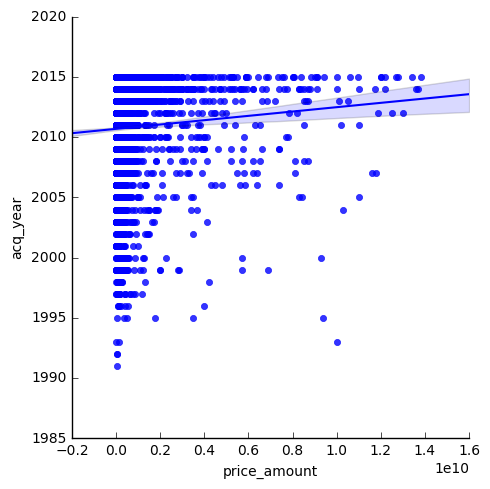

In [70]:
sns.lmplot(x='price_amount', y='acq_year', hue='is_tech' data=dfremovedoutlier)